In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df2015 = pd.read_csv('2015_SEASON_NRL_DATA')
df2016 = pd.read_csv('2016_SEASON_NRL_DATA')
df2017 = pd.read_csv('2017_SEASON_NRL_DATA')
df2018 = pd.read_csv('2018_SEASON_NRL_DATA')
df2019 = pd.read_csv('2019_SEASON_NRL_DATA')
df2020 = pd.read_csv('2020_SEASON_NRL_DATA')
df2021 = pd.read_csv('2021_SEASON_NRL_DATA')
df2022 = pd.read_csv('2022_SEASON_NRL_DATA')

##Calculation of the expected score of team one playing against team two
##param teamOne: ELO rating of team one
##param teamTwo: ELO rating of team two
expectedScore = lambda teamOne, teamTwo : 1/(1+10**((teamTwo - teamOne)/400))

##Updated ELO calculation
##param oldELO: the teams elo before the match is played
##param kValue: a constant
##param actualScore: the actual outcome. 1 for a win, 0.5 for a tie, 0 for loss
##param expectedScore: the probability of the team winning the match
updatedELO = lambda oldELO, kValue, actualScore, expectedScore: oldELO + kValue*(actualScore - expectedScore)

##Function that returns new dictionary with default values
def getNewEloDict():
    eloDict = {
    "Sea Eagles" : 1000,
    "Titans" : 1000,
    "Dolphins" : 1000, ##not in the comp yet for the data that i'm analysing but i'll put it here anyway
    "Rabbitohs" : 1000,
    "Warriors" : 1000,
    "Storm" : 1000,
    "Broncos" : 1000,
    "Cowboys" : 1000,
    "Dragons" : 1000,
    "Raiders" : 1000,
    "Panthers" : 1000,
    "Eels" : 1000,
    "Knights" : 1000,
    "Sharks" : 1000,
    "Roosters" : 1000,
    "Wests Tigers" : 1000,
    "Bulldogs" : 1000
    }
    return eloDict

<h1> Finding an optimal K-value </h1>
<p> Testing each season using k-values from 1-300.  </p>

In [3]:
##This function processes the seasons data, updating elo values and recording the percentage of accuracy of the ELO model
##param df: the dataframe containing the seasons data
##param kValue: the constant that we're trying to optimise
##param eloDict: a dictionary containing the ELO ratings of each team
##
def processSeasonData(df, kValue, eloDict):
    correctCount = 0
    for row in range(len(df)):
        ##getting home team data
        homeTeam = df.loc[row]['Home_Team']
        homeELO = eloDict[homeTeam]
        homeScore = int(df.loc[row]['Home_Score'])

        ##getting away team data
        awayTeam = df.loc[row]['Away_Team']
        awayELO = eloDict[awayTeam]
        awayScore = int(df.loc[row]['Away_Score'])

        ##calculating expected outcomes
        expectedScoreHome = expectedScore(homeELO, awayELO)
        expectedScoreAway = expectedScore(awayELO, homeELO)

        ##creating actual outcome values
        if homeScore == awayScore:
            homeOutcome = 0.5
            awayOutcome = 0.5
        elif homeScore > awayScore:
            homeOutcome = 1
            awayOutcome = 0
        else:
            homeOutcome = 0
            awayOutcome = 1

        ##calculating and updating ELO values
        homeNewELO = updatedELO(homeELO, kValue, homeOutcome, expectedScoreHome)
        awayNewELO = updatedELO(awayELO, kValue, awayOutcome, expectedScoreAway)
        eloDict[homeTeam] = homeNewELO
        eloDict[awayTeam] = awayNewELO

        ##calculating accuracy
        if expectedScoreHome > expectedScoreAway and homeOutcome == 1:
            correctCount += 1
        elif expectedScoreAway > expectedScoreHome and awayOutcome == 1:
            correctCount += 1

    return eloDict, correctCount/len(df)

##This function splits the data from each axis into their own lists
##param list: a list of lists containing a coordinate of kValues and accuracy
##return: returns two lists, one with kValue data and a second with accuracy data
def splitAxisData(list):
    kValueData = [x[0] for x in list]
    accuracyData = [x[1] for x in list]
    return kValueData, accuracyData

<p> Getting lists containing the accuracy percentage for K-values for seasons 2015, 2016, 2017, 2018 using a starting season of 2015 </p>

In [4]:
##Using a max kValue of 300
kValueMax = 300
resultsArray_2015 = []
resultsArray_2016 = []
resultsArray_2017 = []
resultsArray_2018 = []

for kVal in range(kValueMax):
    if kVal == 0:
        continue

    eloDict = getNewEloDict()

    eloDict2015, correctCount = processSeasonData(df2015, kVal, eloDict)
    resultsArray_2015.append([kVal, correctCount])

    eloDict2016, correctCount = processSeasonData(df2016, kVal, eloDict2015)
    resultsArray_2016.append([kVal, correctCount])

    eloDict2017, correctCount = processSeasonData(df2017, kVal, eloDict2016)
    resultsArray_2017.append([kVal, correctCount])

    eloDict2018, correctCount = processSeasonData(df2018, kVal, eloDict2017)
    resultsArray_2018.append([kVal, correctCount])


<p> Plots of the results </p>

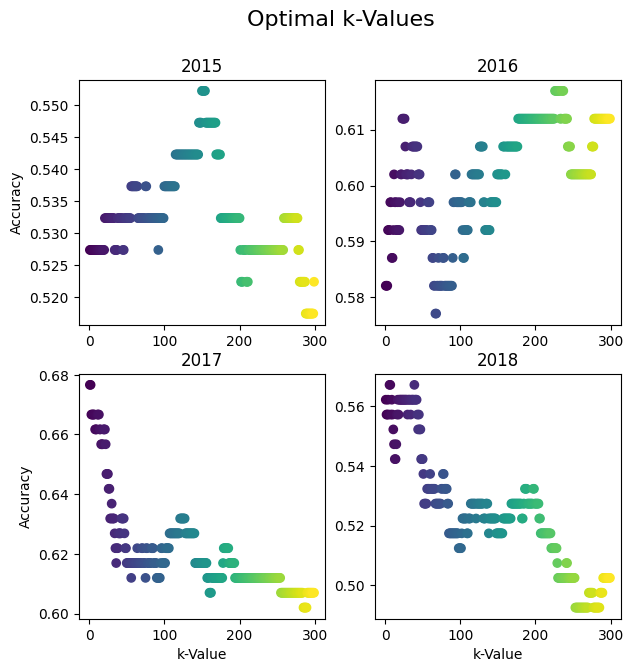

In [5]:
##Splitting data into x and y coordinate lists
kValue_2015, accuracy_2015 = splitAxisData(resultsArray_2015)
kValue_2016, accuracy_2016 = splitAxisData(resultsArray_2016)
kValue_2017, accuracy_2017 = splitAxisData(resultsArray_2017)
kValue_2018, accuracy_2018 = splitAxisData(resultsArray_2018)

##Getting copy of 2017 data to use when finding optimal k-value
accuracy_2017Copy = accuracy_2017[:]

##Creating figures 
fig, ax = plt.subplots(2,2)
fig.suptitle("Optimal k-Values", size = 16)
fig.set_figheight(7)
fig.set_figwidth(7)

##2015
ax[0][0].scatter(kValue_2015, accuracy_2015, c=kValue_2015, cmap = 'viridis')
ax[0][0].set_title('2015')
ax[0][0].set_ylabel('Accuracy')

##2016
ax[0][1].scatter(kValue_2016, accuracy_2016, c=kValue_2016, cmap = 'viridis')
ax[0][1].set_title('2016')

##2017
ax[1][0].scatter(kValue_2017, accuracy_2017, c=kValue_2017, cmap = 'viridis')
ax[1][0].set_title('2017')
ax[1][0].set_xlabel('k-Value')
ax[1][0].set_ylabel('Accuracy')

##2018
ax[1][1].scatter(kValue_2018, accuracy_2018, c=kValue_2018, cmap = 'viridis')
ax[1][1].set_title('2018')
ax[1][1].set_xlabel('k-Value')

plt.show()


<p> Getting lists containing the accuracy percentage for K-values for seasons 2016, 2017, 2018, 2019 using a starting season of 2016 </p>

In [6]:
##Using a max kValue of 300
kValueMax = 300
resultsArray_2016 = []
resultsArray_2017 = []
resultsArray_2018 = []
resultsArray_2019 = []

for kVal in range(kValueMax):
    if kVal == 0:
        continue

    eloDict = getNewEloDict()

    eloDict2016, correctCount = processSeasonData(df2016, kVal, eloDict)
    resultsArray_2016.append([kVal, correctCount])

    eloDict2017, correctCount = processSeasonData(df2017, kVal, eloDict2016)
    resultsArray_2017.append([kVal, correctCount])

    eloDict2018, correctCount = processSeasonData(df2018, kVal, eloDict2017)
    resultsArray_2018.append([kVal, correctCount])

    eloDict2019, correctCount = processSeasonData(df2019, kVal, eloDict2018)
    resultsArray_2019.append([kVal, correctCount])


<p> Plots of the results </p>

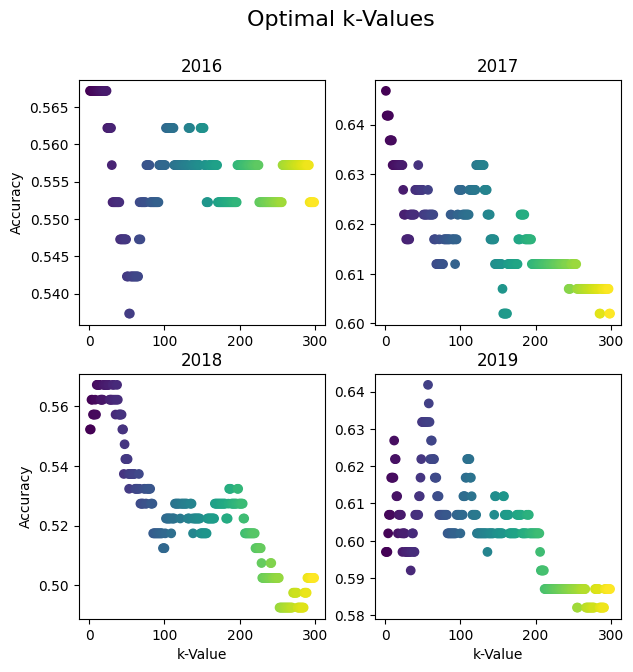

In [7]:
##Splitting data into x and y coordinate lists
kValue_2016, accuracy_2016 = splitAxisData(resultsArray_2016)
kValue_2017, accuracy_2017 = splitAxisData(resultsArray_2017)
kValue_2018, accuracy_2018 = splitAxisData(resultsArray_2018)
kValue_2019, accuracy_2019 = splitAxisData(resultsArray_2019)

##Getting copy of 2018 data to use when finding optimal k-value
accuracy_2018Copy = accuracy_2018[:]

##Creating figures 
fig, ax = plt.subplots(2,2)
fig.suptitle("Optimal k-Values", size = 16)
fig.set_figheight(7)
fig.set_figwidth(7)

##2015
ax[0][0].scatter(kValue_2016, accuracy_2016, c=kValue_2016, cmap = 'viridis')
ax[0][0].set_title('2016')
ax[0][0].set_ylabel('Accuracy')

##2016
ax[0][1].scatter(kValue_2017, accuracy_2017, c=kValue_2017, cmap = 'viridis')
ax[0][1].set_title('2017')

##2017
ax[1][0].scatter(kValue_2018, accuracy_2018, c=kValue_2018, cmap = 'viridis')
ax[1][0].set_title('2018')
ax[1][0].set_xlabel('k-Value')
ax[1][0].set_ylabel('Accuracy')

##2018
ax[1][1].scatter(kValue_2019, accuracy_2019, c=kValue_2019, cmap = 'viridis')
ax[1][1].set_title('2019')
ax[1][1].set_xlabel('k-Value')

plt.show()

<p> Getting lists containing the accuracy percentage for K-values for seasons 2017, 2018, 2019, 2020 using a starting season of 2017 </p>

In [8]:
##Using a max kValue of 300
kValueMax = 300
resultsArray_2017 = []
resultsArray_2018 = []
resultsArray_2019 = []
resultsArray_2020 = []

for kVal in range(kValueMax):
    if kVal == 0:
        continue

    eloDict = getNewEloDict()

    eloDict2017, correctCount = processSeasonData(df2017, kVal, eloDict)
    resultsArray_2017.append([kVal, correctCount])

    eloDict2018, correctCount = processSeasonData(df2018, kVal, eloDict2017)
    resultsArray_2018.append([kVal, correctCount])

    eloDict2019, correctCount = processSeasonData(df2019, kVal, eloDict2018)
    resultsArray_2019.append([kVal, correctCount])

    eloDict2020, correctCount = processSeasonData(df2020, kVal, eloDict2019)
    resultsArray_2020.append([kVal, correctCount])

<p>Plot of the results</p>

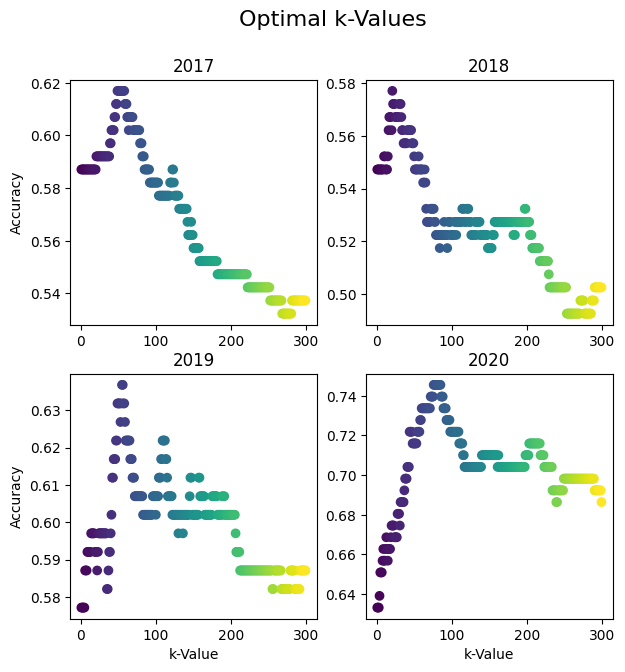

In [9]:
##Splitting data into x and y coordinate lists
kValue_2017, accuracy_2017 = splitAxisData(resultsArray_2017)
kValue_2018, accuracy_2018 = splitAxisData(resultsArray_2018)
kValue_2019, accuracy_2019 = splitAxisData(resultsArray_2019)
kValue_2020, accuracy_2020 = splitAxisData(resultsArray_2020)

##Getting copy of 2019 data to use to find optimal k-value
accuracy_2019Copy = accuracy_2019[:]

##Creating figures 
fig, ax = plt.subplots(2,2)
fig.suptitle("Optimal k-Values", size = 16)
fig.set_figheight(7)
fig.set_figwidth(7)

##2015
ax[0][0].scatter(kValue_2017, accuracy_2017, c=kValue_2017, cmap = 'viridis')
ax[0][0].set_title('2017')
ax[0][0].set_ylabel('Accuracy')

##2016
ax[0][1].scatter(kValue_2018, accuracy_2018, c=kValue_2018, cmap = 'viridis')
ax[0][1].set_title('2018')

##2017
ax[1][0].scatter(kValue_2019, accuracy_2019, c=kValue_2019, cmap = 'viridis')
ax[1][0].set_title('2019')
ax[1][0].set_xlabel('k-Value')
ax[1][0].set_ylabel('Accuracy')

##2018
ax[1][1].scatter(kValue_2020, accuracy_2020, c=kValue_2020, cmap = 'viridis')
ax[1][1].set_title('2020')
ax[1][1].set_xlabel('k-Value')

plt.show()

<p> Getting lists containing the accuracy percentage for K-values for seasons 2018, 2019, 2020, 2021 using a starting season of 2018 </p>

In [10]:
##Using a max kValue of 300
kValueMax = 300
resultsArray_2018 = []
resultsArray_2019 = []
resultsArray_2020 = []
resultsArray_2021 = []

for kVal in range(kValueMax):
    if kVal == 0:
        continue

    eloDict = getNewEloDict()

    eloDict2018, correctCount = processSeasonData(df2018, kVal, eloDict)
    resultsArray_2018.append([kVal, correctCount])

    eloDict2019, correctCount = processSeasonData(df2019, kVal, eloDict2018)
    resultsArray_2019.append([kVal, correctCount])

    eloDict2020, correctCount = processSeasonData(df2020, kVal, eloDict2019)
    resultsArray_2020.append([kVal, correctCount])

    eloDict2021, correctCount = processSeasonData(df2021, kVal, eloDict2020)
    resultsArray_2021.append([kVal, correctCount])

<p>Plot of the results</p>

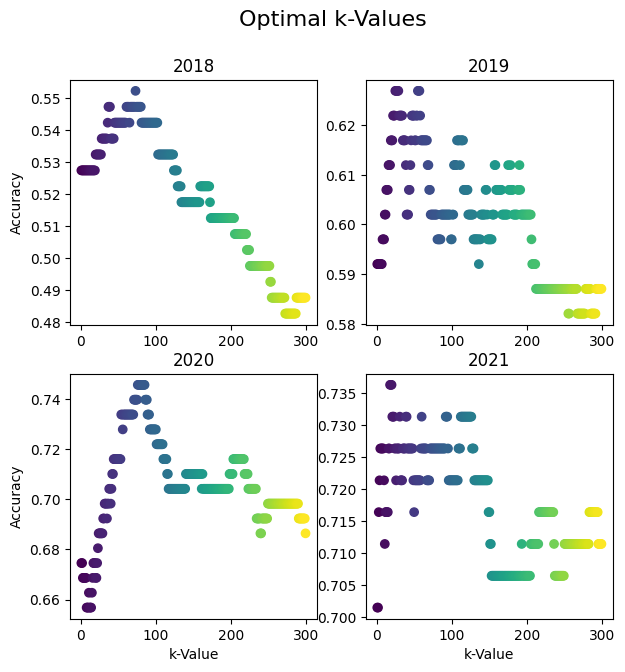

In [11]:
##Splitting data into x and y coordinate lists
kValue_2018, accuracy_2018 = splitAxisData(resultsArray_2018)
kValue_2019, accuracy_2019 = splitAxisData(resultsArray_2019)
kValue_2020, accuracy_2020 = splitAxisData(resultsArray_2020)
kValue_2021, accuracy_2021 = splitAxisData(resultsArray_2021)

##Getting copy of 2020 accuracy for finding optimal value
accuracy_2020Copy = accuracy_2020[:]

##Creating figures 
fig, ax = plt.subplots(2,2)
fig.suptitle("Optimal k-Values", size = 16)
fig.set_figheight(7)
fig.set_figwidth(7)

##2015
ax[0][0].scatter(kValue_2018, accuracy_2018, c=kValue_2018, cmap = 'viridis')
ax[0][0].set_title('2018')
ax[0][0].set_ylabel('Accuracy')

##2016
ax[0][1].scatter(kValue_2019, accuracy_2019, c=kValue_2019, cmap = 'viridis')
ax[0][1].set_title('2019')

##2017
ax[1][0].scatter(kValue_2020, accuracy_2020, c=kValue_2020, cmap = 'viridis')
ax[1][0].set_title('2020')
ax[1][0].set_xlabel('k-Value')
ax[1][0].set_ylabel('Accuracy')

##2018
ax[1][1].scatter(kValue_2021, accuracy_2021, c=kValue_2021, cmap = 'viridis')
ax[1][1].set_title('2021')
ax[1][1].set_xlabel('k-Value')

plt.show()

<p> Getting lists containing the accuracy percentage for K-values for seasons 2019, 2020, 2021, 2022 using a starting season of 2019 </p>

In [12]:
##Using a max kValue of 300
kValueMax = 300
resultsArray_2019 = []
resultsArray_2020 = []
resultsArray_2021 = []
resultsArray_2022 = []

for kVal in range(kValueMax):
    if kVal == 0:
        continue

    eloDict = getNewEloDict()

    eloDict2019, correctCount = processSeasonData(df2019, kVal, eloDict)
    resultsArray_2019.append([kVal, correctCount])

    eloDict2020, correctCount = processSeasonData(df2020, kVal, eloDict2019)
    resultsArray_2020.append([kVal, correctCount])

    eloDict2021, correctCount = processSeasonData(df2021, kVal, eloDict2020)
    resultsArray_2021.append([kVal, correctCount])

    eloDict2022, correctCount = processSeasonData(df2022, kVal, eloDict2021)
    resultsArray_2022.append([kVal, correctCount])

<p>Plot of the results</p>

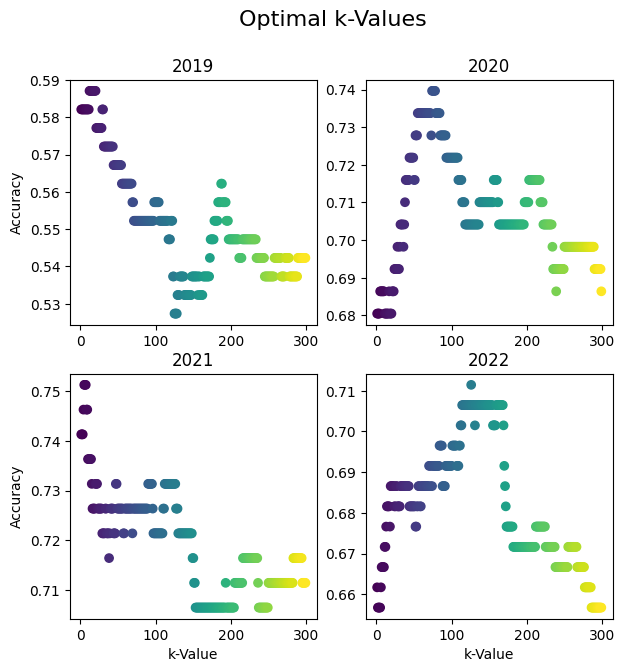

In [13]:
##Splitting data into x and y coordinate lists
kValue_2019, accuracy_2019 = splitAxisData(resultsArray_2019)
kValue_2020, accuracy_2020 = splitAxisData(resultsArray_2020)
kValue_2021, accuracy_2021 = splitAxisData(resultsArray_2021)
kValue_2022, accuracy_2022 = splitAxisData(resultsArray_2022)

##Getting copy of 2021 data to use when finding optimal k-value
accuracy_2021Copy = accuracy_2021[:]

##Creating figures 
fig, ax = plt.subplots(2,2)
fig.suptitle("Optimal k-Values", size = 16)
fig.set_figheight(7)
fig.set_figwidth(7)

##2015
ax[0][0].scatter(kValue_2019, accuracy_2019, c=kValue_2019, cmap = 'viridis')
ax[0][0].set_title('2019')
ax[0][0].set_ylabel('Accuracy')

##2016
ax[0][1].scatter(kValue_2020, accuracy_2020, c=kValue_2020, cmap = 'viridis')
ax[0][1].set_title('2020')

##2017
ax[1][0].scatter(kValue_2021, accuracy_2021, c=kValue_2021, cmap = 'viridis')
ax[1][0].set_title('2021')
ax[1][0].set_xlabel('k-Value')
ax[1][0].set_ylabel('Accuracy')

##2018
ax[1][1].scatter(kValue_2022, accuracy_2022, c=kValue_2022, cmap = 'viridis')
ax[1][1].set_title('2022')
ax[1][1].set_xlabel('k-Value')

plt.show()

In [16]:
##Getting optimal k-value. The optimal value will be the index + 1 as the index starts at 0
maxSum = 0
for index in range(len(accuracy_2021Copy)): ##Just an arbitrary list, could be any of the copies
    currentSum = accuracy_2017Copy[index] + accuracy_2018Copy[index] + accuracy_2019Copy[index] + accuracy_2020Copy[index] + accuracy_2021Copy[index]
    if currentSum >= maxSum:
        optimalK = index
    maxSum = max(maxSum, currentSum)

print(optimalK)

54


<p> From above, the index given is 54. Therefore optimal k-value is 55</p>